In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pyodbc 
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=localhost;'
    'DATABASE=Analysis_Project;'
    'Trusted_Connection=yes;'
)


In [3]:
conn = pyodbc.connect(conn_str)

In [4]:
tables = pd.read_sql("SELECT TABLE_SCHEMA, TABLE_NAME FROM INFORMATION_SCHEMA.TABLES", conn)
print(tables)


  TABLE_SCHEMA       TABLE_NAME
0          dbo  shopping_trends
1          dbo      sysdiagrams


In [5]:
query = "SELECT * FROM dbo.shopping_trends"
data = pd.read_sql(query, conn)

data.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
data.shape

(3900, 19)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [8]:
data.isnull().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.nunique()

Customer_ID                 3900
Age                           53
Gender                         2
Item_Purchased                25
Category                       4
Purchase_Amount_USD           81
Location                      50
Size                           4
Color                         25
Season                         4
Review_Rating                 26
Subscription_Status            2
Payment_Method                 6
Shipping_Type                  6
Discount_Applied               2
Promo_Code_Used                2
Previous_Purchases            50
Preferred_Payment_Method       6
Frequency_of_Purchases         7
dtype: int64

In [11]:
data["Size"].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

In [12]:
data.groupby("Size")["Category"].value_counts()

Size  Category   
L     Clothing       481
      Accessories    307
      Footwear       172
      Outerwear       93
M     Clothing       778
      Accessories    562
      Footwear       267
      Outerwear      148
S     Clothing       284
      Accessories    230
      Footwear        93
      Outerwear       56
XL    Clothing       194
      Accessories    141
      Footwear        67
      Outerwear       27
Name: count, dtype: int64

In [13]:
data.groupby("Size")["Item_Purchased"].value_counts()

Size  Item_Purchased
L     Skirt             53
      Jacket            48
      Dress             47
      Shoes             47
      Blouse            46
                        ..
XL    Coat              14
      Boots             13
      Jacket            13
      Sunglasses        13
      Skirt             11
Name: count, Length: 100, dtype: int64

In [14]:
data.groupby("Discount_Applied")["Category"].value_counts()


Discount_Applied  Category   
No                Clothing       1006
                  Accessories     697
                  Footwear        340
                  Outerwear       180
Yes               Clothing        731
                  Accessories     543
                  Footwear        259
                  Outerwear       144
Name: count, dtype: int64

In [15]:
data.groupby("Season")["Purchase_Amount_USD"].sum()


Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase_Amount_USD, dtype: int64

In [16]:
data.groupby("Preferred_Payment_Method")["Purchase_Amount_USD"].sum()


Preferred_Payment_Method
Bank Transfer    36544
Cash             40002
Credit Card      40310
Debit Card       38742
PayPal           40109
Venmo            37374
Name: Purchase_Amount_USD, dtype: int64

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase_Amount_USD,3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review_Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous_Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


<Axes: xlabel='Purchase_Amount_USD', ylabel='Count'>

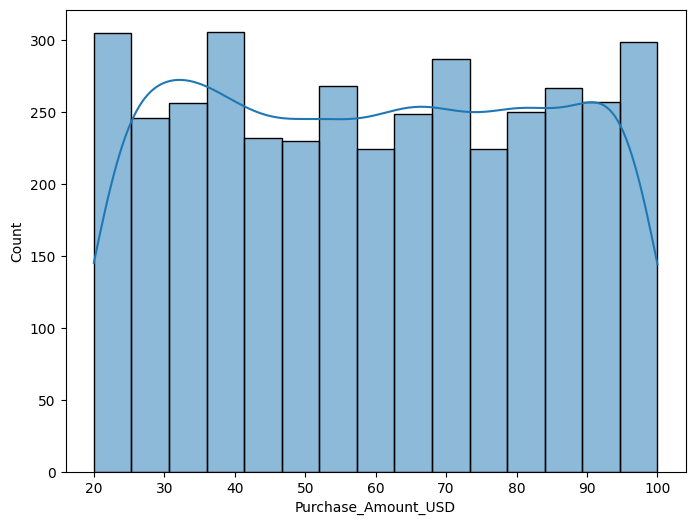

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(data= data , x="Purchase_Amount_USD",bins=15 , kde = True)

<Axes: xlabel='Age', ylabel='Count'>

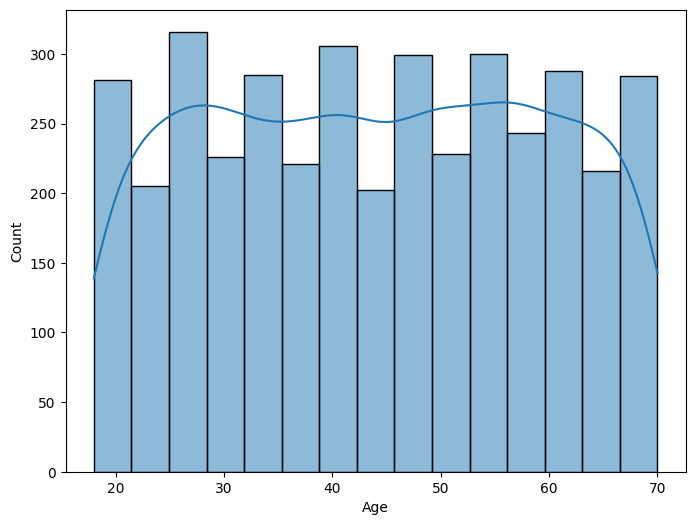

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(data= data , x="Age",bins=15 , kde = True)

<Axes: xlabel='Category', ylabel='count'>

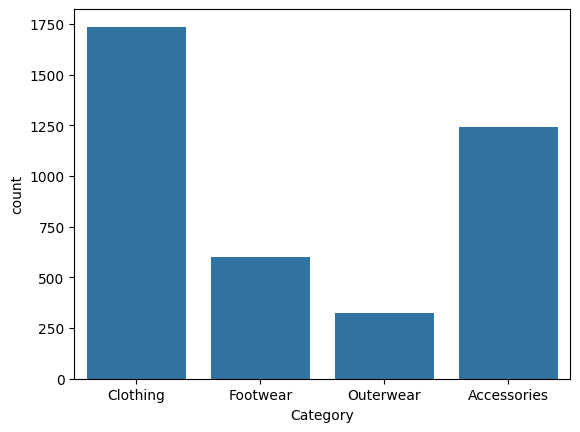

In [20]:
sns.countplot(data= data , x="Category")

<Axes: xlabel='Size', ylabel='count'>

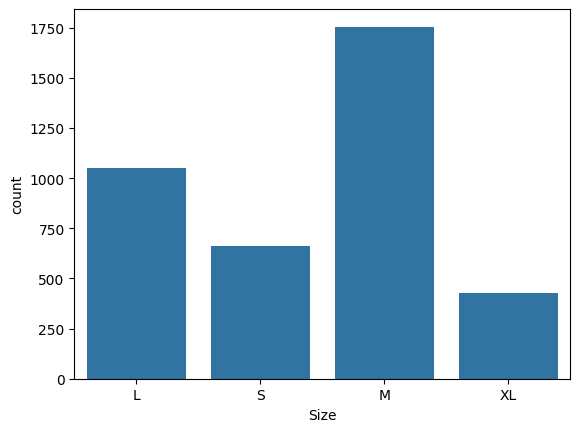

In [21]:
sns.countplot(data= data , x="Size")

<Axes: xlabel='Preferred_Payment_Method', ylabel='count'>

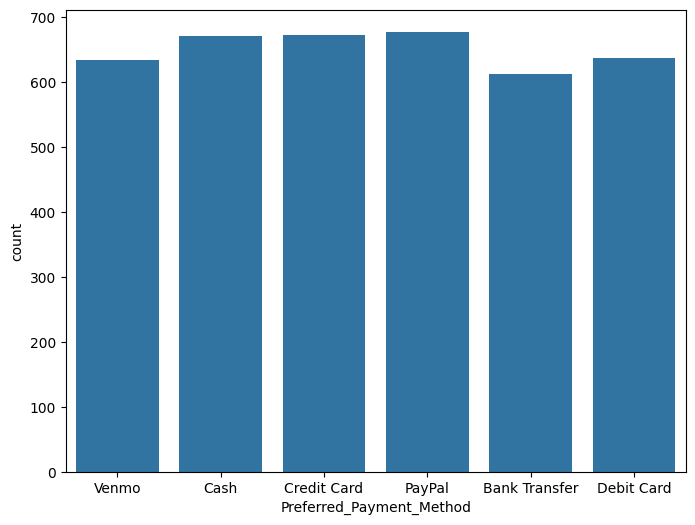

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(data= data , x="Preferred_Payment_Method")

<Axes: xlabel='Frequency_of_Purchases', ylabel='count'>

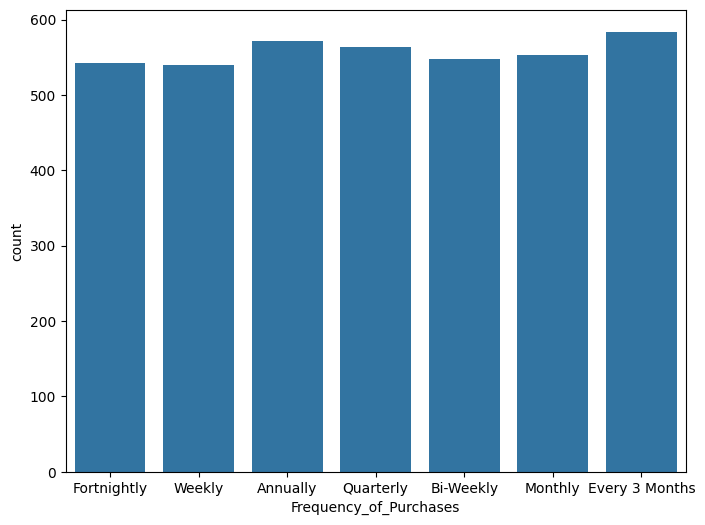

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(data= data , x="Frequency_of_Purchases")

<Axes: xlabel='Shipping_Type', ylabel='count'>

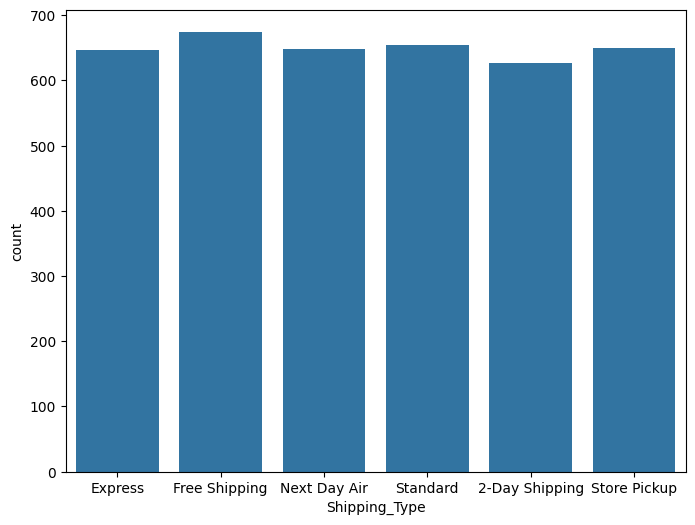

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(data= data , x="Shipping_Type")

<Axes: xlabel='Size', ylabel='count'>

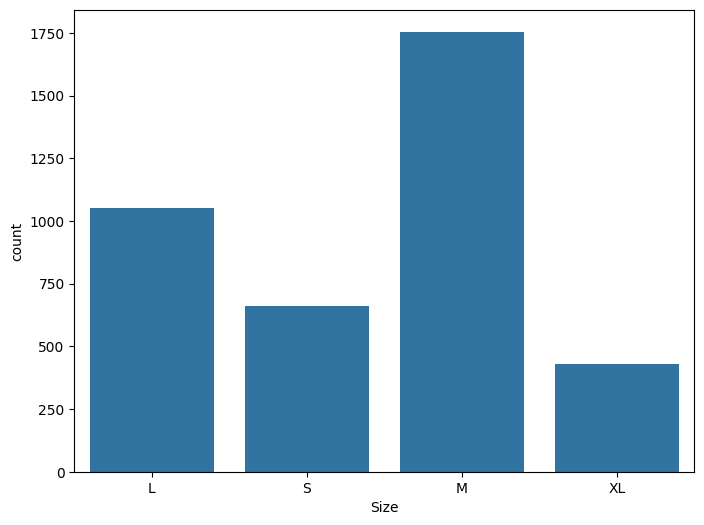

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(data= data , x="Size")

In [26]:
fig = px.scatter(data, x='Previous_Purchases', y='Purchase_Amount_USD', title='Scatter Plot to Detect Outliers')

fig.show()

In [27]:
fig = px.box(data, x="Purchase_Amount_USD", y="Previous_Purchases", color="Gender", hover_name="Purchase_Amount_USD")
fig.show()

In [28]:
fig = px.box(data, x="Purchase_Amount_USD", y="Discount_Applied", color="Gender", hover_name="Purchase_Amount_USD")
fig.show()

In [29]:
fig = px.histogram(data, x="Purchase_Amount_USD", color="Gender", hover_name="Purchase_Amount_USD")
fig.show()

In [30]:
fig = px.histogram(data, x="Purchase_Amount_USD", y="Age", color="Size", hover_name="Purchase_Amount_USD")
fig.show()

In [31]:
fig = px.histogram(data, x="Purchase_Amount_USD", y="Age", color="Preferred_Payment_Method", hover_name="Purchase_Amount_USD")
fig.show()

In [32]:
fig = px.histogram(data, x="Purchase_Amount_USD", color="Frequency_of_Purchases", hover_name="Purchase_Amount_USD")
fig.show()

In [33]:
fig = px.histogram(data, x="Purchase_Amount_USD", color="Season", hover_name="Purchase_Amount_USD")
fig.show()

In [34]:
fig = px.histogram(data, x="Review_Rating", color="Shipping_Type", hover_name="Purchase_Amount_USD")
fig.show()

In [35]:
fig = px.histogram(data, x="Purchase_Amount_USD", color="Discount_Applied", hover_name="Purchase_Amount_USD")
fig.show()

In [36]:
fig = px.pie(data, values = "Purchase_Amount_USD" , names = "Shipping_Type", title="Shipping Type-Purchase Amount(USD)")
fig.show()

In [37]:
fig = px.pie(data, values = "Review_Rating" , names = "Subscription_Status", title="Shipping Type-Purchase Amount(USD)")
fig.show()

In [38]:
fig = px.pie(data, values = "Review_Rating" , names = "Shipping_Type", title="Shipping Type-Purchase Amount(USD)")
fig.show()

<Axes: >

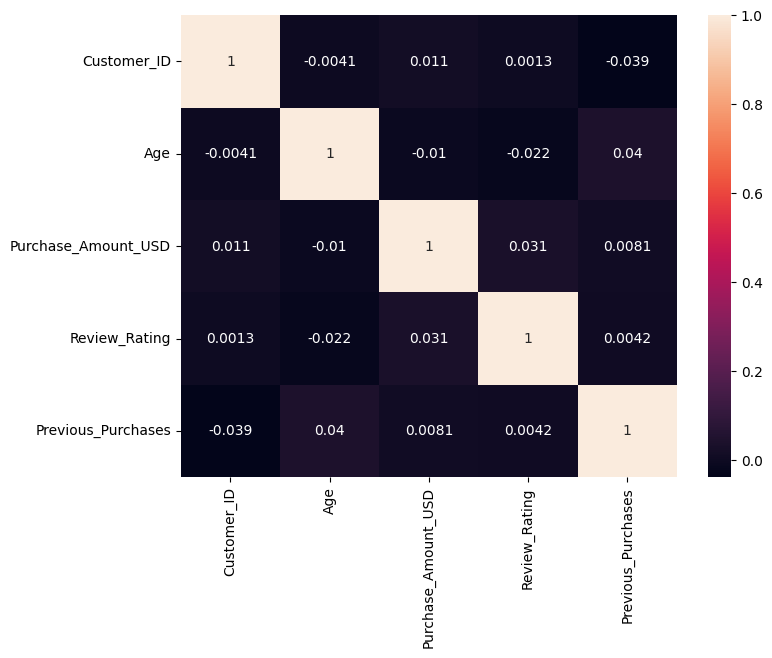

In [39]:
plt.figure(figsize=(8,6))
data_num = data.select_dtypes(include='number')
sns.heatmap(data_num.corr(),annot=True)